In [154]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [156]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data'

In [158]:
cols = ['name', 'landmass', 'zone', 'area', 'population', 'language', 'religion', 'bars', 
        'stripes', 'colours', 'red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 
        'mainhue', 'circles', 'crosses', 'saltires', 'quarters', 'sunstars', 'crescent', 
        'triangle', 'icon', 'animate', 'text', 'topleft', 'botright']

In [174]:
var = [ 'red', 'green', 'blue','gold', 'white', 'black', 'orange','bars',
       'stripes', 'circles','crosses', 'saltires','quarters','sunstars','triangle','animate']

In [176]:
df = pd.read_csv(url, names = cols)

In [190]:
pd.options.display.max_columns = None

In [192]:
display(df)

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Western-Samoa,6,3,3,0,1,1,0,0,3,1,0,1,0,1,0,0,red,0,0,0,1,5,0,0,0,0,0,blue,red
190,Yugoslavia,3,1,256,22,6,6,0,3,4,1,0,1,1,1,0,0,red,0,0,0,0,1,0,0,0,0,0,blue,red
191,Zaire,4,2,905,28,10,5,0,0,4,1,1,0,1,0,0,1,green,1,0,0,0,0,0,0,1,1,0,green,green
192,Zambia,4,2,753,6,10,5,3,0,4,1,1,0,0,0,1,1,green,0,0,0,0,0,0,0,0,1,0,green,brown


In [194]:
landmass = df['landmass'].value_counts().sort_values(ascending=False)

In [196]:
landmass

landmass
4    52
5    39
3    35
1    31
6    20
2    17
Name: count, dtype: int64

In [198]:
df_36 = df[df['landmass'].isin([3, 6])]

In [205]:
print(df_36.groupby('landmass')[var].mean().T)

landmass         3     6
red       0.828571  0.80
green     0.200000  0.20
blue      0.514286  0.80
gold      0.428571  0.60
white     0.771429  0.95
black     0.171429  0.15
orange    0.057143  0.15
bars      0.628571  0.00
stripes   1.285714  0.40
circles   0.028571  0.15
crosses   0.285714  0.40
saltires  0.028571  0.30
quarters  0.028571  0.40
sunstars  0.142857  3.30
triangle  0.028571  0.25
animate   0.114286  0.30


In [209]:
labels = (df['landmass'].isin([3,6]))*1

In [211]:
df_36[var].dtypes

red         int64
green       int64
blue        int64
gold        int64
white       int64
black       int64
orange      int64
bars        int64
stripes     int64
circles     int64
crosses     int64
saltires    int64
quarters    int64
sunstars    int64
triangle    int64
animate     int64
dtype: object

In [207]:
data = pd.get_dummies(df[var])

In [215]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, random_state=1, test_size=.4)

In [217]:
depths = range(1,21)

In [219]:
acc_depth = []

In [221]:
for i in depths:
    dt = DecisionTreeClassifier(random_state=10, max_depth=i)
    dt.fit(x_train, y_train)
    acc_depth.append(dt.score(x_test, y_test))

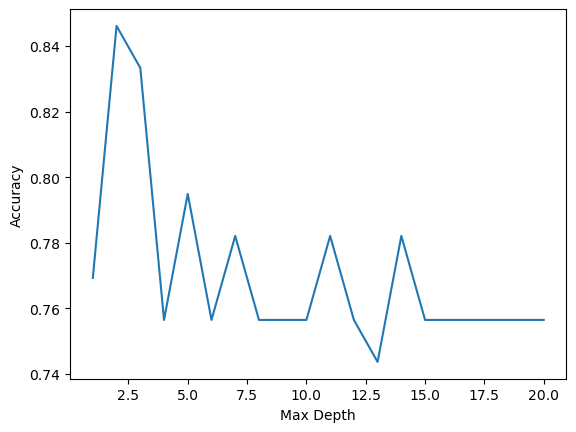

In [223]:
plt.plot(depths, acc_depth)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

In [225]:
max_acc = np.max(acc_depth)
best_depth = depths[np.argmax(acc_depth)]
print(f'Highest accuracy at {round(max_acc,3) *100}% at depth {best_depth}')

Highest accuracy at 84.6% at depth 2


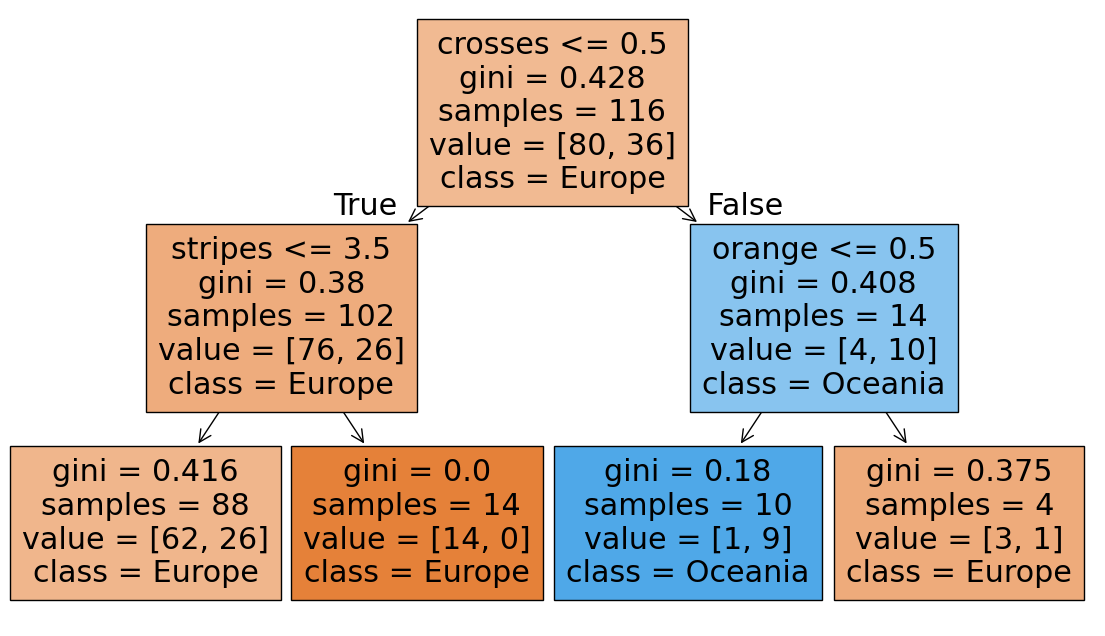

In [265]:
plt.figure(figsize=(14,8))
dt = DecisionTreeClassifier(random_state=1, max_depth=best_depth)
dt.fit(x_train, y_train)
tree.plot_tree(dt, feature_names=x_train.columns, class_names=['Europe', 'Oceania'], filled=True)
plt.show()

In [271]:
acc_pruned = []

In [273]:
ccp = np.logspace(-3, 0 , num=20)

In [275]:
for i in ccp:
    dt_pruned = DecisionTreeClassifier(random_state=1, max_depth=best_depth, ccp_alpha=i)
    dt_pruned.fit(x_train, y_train)
    accuracy = dt_pruned.score(x_test, y_test)
    acc_pruned.append(accuracy)

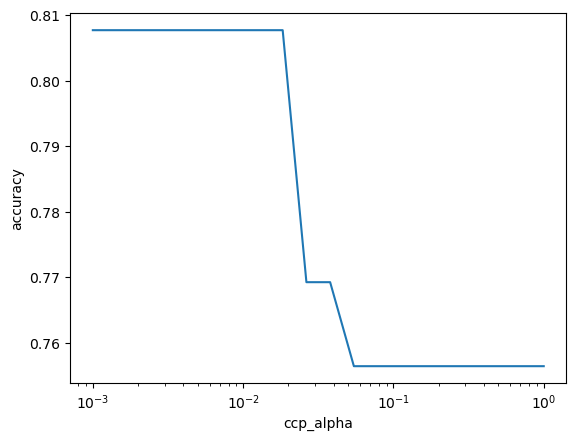

In [277]:
plt.plot(ccp, acc_pruned)
plt.xscale('log')
plt.xlabel('ccp_alpha')
plt.ylabel('accuracy')
plt.show()

In [281]:
max_acc_pruned = np.max(acc_pruned)
best_ccp = ccp[np.argmax(acc_pruned)]

In [283]:
print(f'Highest accuracy {round(max_acc_pruned,3)*100}% at ccp_alpha {round(best_ccp,4)}')

Highest accuracy 80.80000000000001% at ccp_alpha 0.001


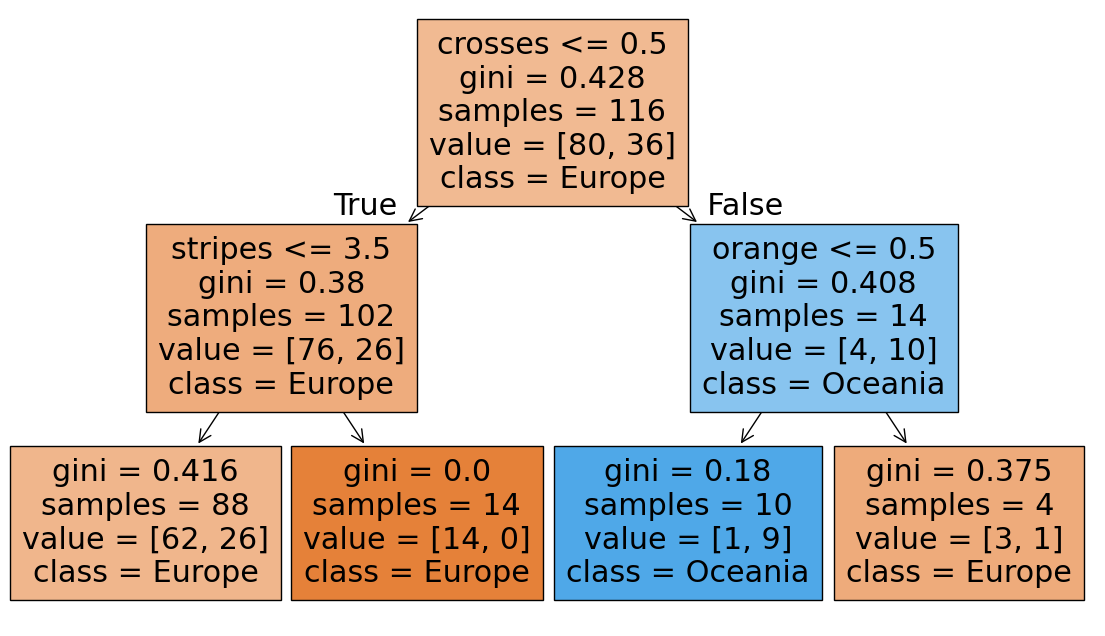

In [285]:
dt_final = DecisionTreeClassifier(random_state=1, max_depth=best_depth, ccp_alpha=best_ccp)
dt_final.fit(x_train, y_train)
plt.figure(figsize=(14,8))
tree.plot_tree(dt_final, feature_names=x_train.columns, class_names=['Europe', 'Oceania'], filled=True)
plt.show()